KN production company conducts maketing campaign on several channels: online, delivering, telemakerting to deliver flowers by mail order. The company is now trying to get into the lucrative DUS market by selling one year orchids subscriptions. The marketing department have done a pilot study and tried the following marketing method.  

in digital marketing, company collects information from number of visits on their websites, to see visitors are interested in their products. Company also conduct second campaign A: **Sending a mail with a colorful brochure that invites people to sign up for a one year orchird subscription.**

The marketing department sent out 16 mails of type A. Six household received a mail signed up for one year of orchird and marketing now wants to know, how good is method A?   

Q1: **What would the rate of sign-up be if method A was used on a larger number of people?**

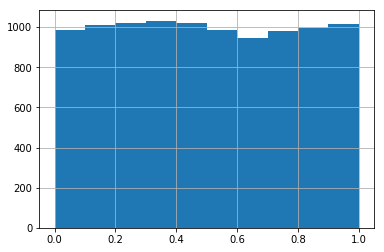

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Number of random draws from the prior
n_draw = 10000

# Defining and drawing from the prior distribution 
prior_rate = pd.Series(np.random.uniform(0, 1, size = n_draw)) 

# It's always good to eyeball the prior to make sure it looks ok.
prior_rate.hist()


In [10]:
# Defining the generative model
def gen_model(prob):
    return(np.random.binomial(16, prob))

#  the generative model
subscribers = list()

# Simulating the data
for p in prior_rate:
    subscribers.append(gen_model(p))
                    
# Observed data
observed_data = 6


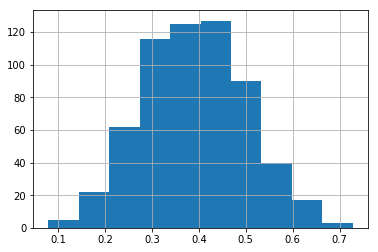

In [11]:
# Here you filter off all draws that do not match the data.
post_rate = prior_rate[list(map(lambda x: x == observed_data, subscribers))]

post_rate.hist() # Eyeball the posterior


# Note    
that we got enought draws left after the filtering. There are no rules here, but you probably want to aim for >1000 draws.  Now you can summarize the posterior, where a common summary is to take the mean or the median posterior, and perhaps a 95% quantile interval.




In [12]:
print('Number of draws left: %d, Posterior mean: %.3f, Posterior median: %.3f, Posterior 95%% quantile interval: %.3f-%.3f' % 
      (len(post_rate), post_rate.mean(), post_rate.median(), post_rate.quantile(.025), post_rate.quantile(.975)))


Number of draws left: 607, Posterior mean: 0.392, Posterior median: 0.391, Posterior 95% quantile interval: 0.192-0.613


Question II : **What’s the probability that method A is better than telemarketing?**

In [13]:
sum(post_rate > 0.2) / len(post_rate) # or just np.mean(post_rate > 0.2)

0.9637561779242174

Question III**If method A was used on 100 people what would be number of sign-ups**

Sign-up 95% quantile interval 17-63


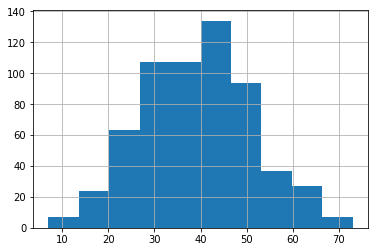

In [16]:
# This can be done with a for loop
signups = list()

for p in post_rate:
    signups.append(np.random.binomial(100, p))


# But we can write it like this:
signups = pd.Series([np.random.binomial(n = 100, p = p) for p in post_rate])

signups.hist()
print('Sign-up 95%% quantile interval %d-%d' % tuple(signups.quantile([.025, .975]).values))


So a decent guess is that is would be between 20 and 60 sign-umps.